<a href="https://colab.research.google.com/github/krishcmd/Data_Analytics/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('penguins.csv')

In [3]:
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
data.isna().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
data['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [6]:
# fill null values in column of characters with the mode value
mode_value = data["sex"].mode()[0]
data["sex"].fillna(mode_value, inplace=True)

# identify the columns with null values
cols_with_null = data.columns[data.isnull().any()].tolist()
# fill null values with mean value
for col in cols_with_null:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [7]:
mode_value

'male'

In [8]:
data.isna().sum()

Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [9]:
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [10]:
df=data.drop(['species','year','Unnamed: 0'],axis=1) 

In [11]:
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,male
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,female


In [12]:
df=pd.get_dummies(df) #one hot encoding

In [13]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


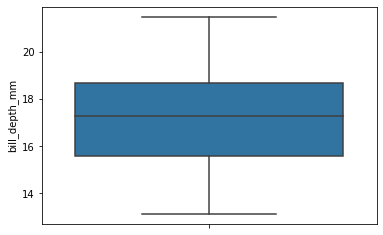

In [14]:
sns.boxplot(y="bill_depth_mm",data=df)
plt.show()

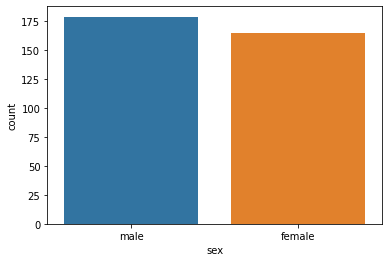

In [15]:
sns.countplot(x='sex',data=data)
plt.show()

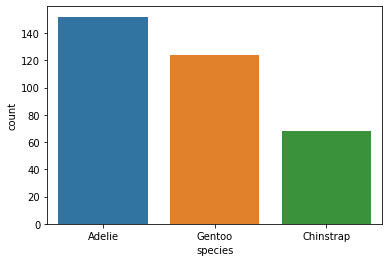

In [16]:
sns.countplot(x='species',data=data)
plt.show()

#K-Means Clustering

In [17]:
#Elbow method to find k value


from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++', random_state=101)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)#inertia is the keyword to find the wcss value


In [18]:
print(wcss)

[219386999.05988032, 59289569.82751611, 29298515.9267647, 16452756.050971303, 10978382.215777956, 8254091.730301483, 5929017.560619995, 4737670.823255281, 3603525.327878924, 3004969.804350988]


In [19]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


Text(0, 0.5, 'WCSS')

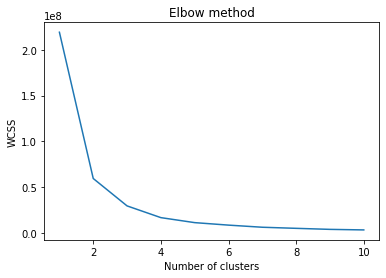

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [23]:
model=KMeans(n_clusters=3,init = 'k-means++', random_state=101)
model.fit(df)

KMeans(n_clusters=3, random_state=101)

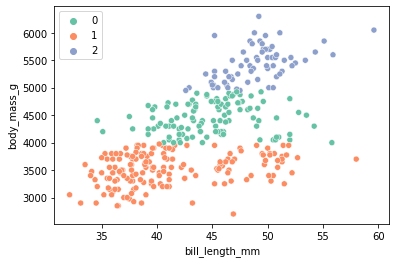

In [24]:
sns.scatterplot(x=df['bill_length_mm'],y=df['body_mass_g'],hue=model.labels_,palette='Set2')

#Agglomerative Hierarchical Clustering

In [26]:
#To know the optimum number of cluster, plot a dendogram

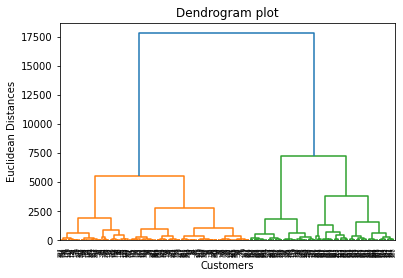

In [28]:
import scipy.cluster.hierarchy as shc

dendro=shc.dendrogram(shc.linkage(df,method='ward'))

plt.title("Dendrogram plot")

plt.ylabel("Euclidean Distances")

plt.xlabel("Customers")

plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [33]:
y_hc = hc.fit_predict(df)

In [34]:
y_hc

array([0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 4,
       2, 4, 3, 2, 2, 3, 2, 3, 2, 4, 2, 4, 0, 4, 0, 4, 2, 3, 4, 3, 2, 3,
       3, 3, 0, 4, 2, 4, 3, 2, 3, 4, 3, 3, 3, 3, 2, 3, 0, 4, 2, 2, 4, 3,
       0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4, 0, 3, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 3, 3, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 3, 3, 4,
       3, 3, 2, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 4,
       2, 4, 2, 4, 3, 4, 3, 0, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1,